# Imports

In [10]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import re
import os
from scipy.signal import savgol_filter
from matplotlib.backends.backend_pdf import PdfPages

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'size'   : 28}



matplotlib.rc('font', **font)

# Loss convergence

In [2]:
def load_data_stores(pattern):
    files = os.listdir("outputs/paper_plots/folders_with_models/")
    files_matched = [filename for filename in files if not (re.search(pattern, filename) is None)]
    return [torch.load(os.path.join("outputs", filename, "data_store.pth")) for filename in files_matched]        

## QNG vs. Baseline

In [160]:
ds_ring_baseline = load_data_stores("ring_baseline[0-9]")
ds_ring_qng = load_data_stores("ring_qng[0-9]")
ds_double_baseline = load_data_stores("double_baseline[0-9]")
ds_double_qng = load_data_stores("double_qng[0-9]")

print(len(ds_ring_baseline), len(ds_ring_qng))
print(len(ds_double_baseline), len(ds_double_qng))


10 10
10 10


In [161]:
loss_ring_baseline = np.array([ds["loss"] for ds in ds_ring_baseline])
loss_ring_qng = np.array([ds["loss"] for ds in ds_ring_qng])
loss_double_baseline = np.array([ds["loss"] for ds in ds_double_baseline])
loss_double_qng  = np.array([ds["loss"] for ds in ds_double_qng])

In [167]:
means_ring_baseline = np.mean(loss_ring_baseline, axis=0)
means_ring_qng = np.mean(loss_ring_qng, axis=0)
means_double_baseline = np.mean(loss_double_baseline, axis=0)
means_double_qng = np.nanmean(loss_double_qng, axis=0)

std_ring_baseline = np.std(loss_ring_baseline, axis=0)
std_ring_qng = np.std(loss_ring_qng, axis=0)
std_double_baseline = np.std(loss_double_baseline, axis=0)
std_double_qng = np.nanstd(loss_double_qng, axis=0)

In [168]:
min1 = np.min(means_ring_baseline - std_ring_baseline)
min2 = np.min(means_ring_qng - std_ring_qng)
min3 = np.min(means_double_baseline - std_double_baseline)
min4 = np.min(means_double_qng - std_double_qng)

eps = 1.e-1
min_loss_ring = min(min1, min2) - eps
min_loss_double = min(min3, min4) - eps

corr_ring_baseline = means_ring_baseline - min_loss_ring
corr_ring_qng = means_ring_qng - min_loss_ring
corr_double_baseline = means_double_baseline - min_loss_double
corr_double_qng = means_double_qng - min_loss_double

In [169]:
window_length = 3
polyorder = 1

smooth_ring_baseline = savgol_filter(corr_ring_baseline, window_length, polyorder)
smooth_std_ring_baseline = savgol_filter(std_ring_baseline, window_length, polyorder)
smooth_ring_qng = savgol_filter(corr_ring_qng, window_length, polyorder)
smooth_std_ring_qng = savgol_filter(std_ring_qng, window_length, polyorder)
smooth_double_baseline = savgol_filter(corr_double_baseline, window_length, polyorder)
smooth_std_double_baseline = savgol_filter(std_double_baseline, window_length, polyorder)
smooth_double_qng = savgol_filter(corr_double_qng, window_length, polyorder)
smooth_std_double_qng = savgol_filter(std_double_qng, window_length, polyorder)

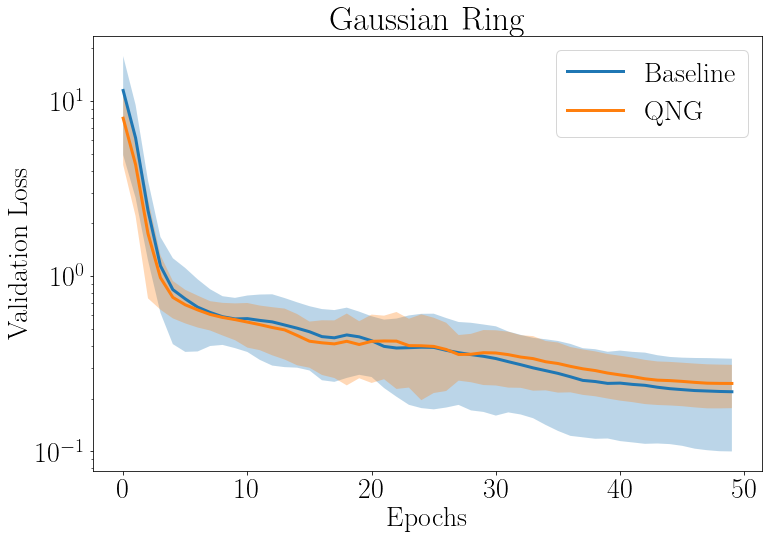

In [170]:
with PdfPages(os.path.join("inn_results", f"convergence_ring_qng.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_ring_baseline)), smooth_ring_baseline, linewidth=3.0, label="Baseline")
    plt.fill_between(range(len(smooth_ring_baseline)), 
                     smooth_ring_baseline-smooth_std_ring_baseline, 
                     smooth_ring_baseline+smooth_std_ring_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_ring_qng)), smooth_ring_qng, linewidth=3.0, label="QNG")
    plt.fill_between(range(len(smooth_ring_qng)), 
                     smooth_ring_qng-smooth_std_ring_qng, 
                     smooth_ring_qng+smooth_std_ring_qng,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Gaussian Ring")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

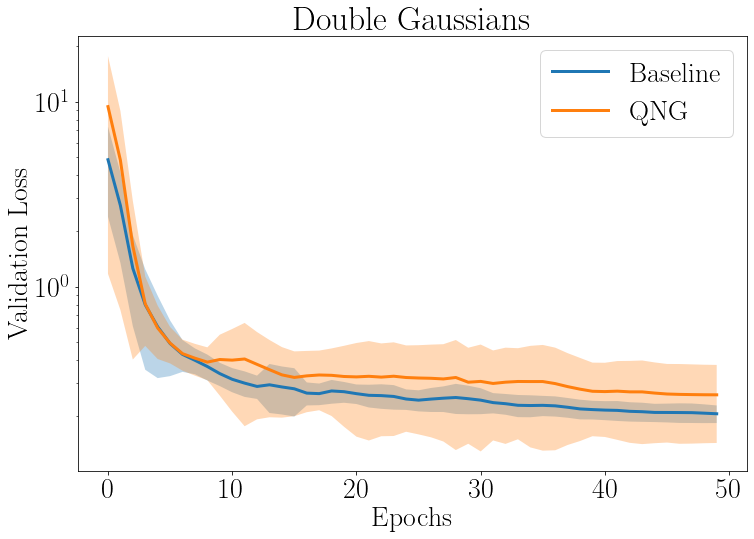

In [171]:
with PdfPages(os.path.join("inn_results", f"convergence_double_qng.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_double_baseline)), smooth_double_baseline, linewidth=3.0, label="Baseline")
    plt.fill_between(range(len(smooth_double_baseline)), 
                     smooth_double_baseline-smooth_std_double_baseline, 
                     smooth_double_baseline+smooth_std_double_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_double_qng)), smooth_double_qng, linewidth=3.0, label="QNG")
    plt.fill_between(range(len(smooth_double_qng)), 
                     smooth_double_qng-smooth_std_double_qng, 
                     smooth_double_qng+smooth_std_double_qng,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Double Gaussians")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

## Complex vs. Baseline

In [107]:
ds_ring_baseline = load_data_stores("ring_baseline[0-9]")
ds_ring_complex = load_data_stores("ring_complexSP[0-9]")
ds_double_baseline = load_data_stores("double_baseline[0-9]")
ds_double_complex = load_data_stores("double_complexSP[0-9]")

print(len(ds_ring_baseline), len(ds_ring_complex))
print(len(ds_double_baseline), len(ds_double_complex))


10 10
10 10


In [108]:
loss_ring_baseline = np.array([ds["loss"] for ds in ds_ring_baseline])
loss_ring_complex = np.array([ds["loss"] for ds in ds_ring_complex])
loss_double_baseline = np.array([ds["loss"] for ds in ds_double_baseline])
loss_double_complex  = np.array([ds["loss"] for ds in ds_double_complex])

In [122]:
means_ring_baseline = np.mean(loss_ring_baseline, axis=0)
means_ring_complex = np.nanmean(loss_ring_complex, axis=0)
means_double_baseline = np.mean(loss_double_baseline, axis=0)
means_double_complex = np.mean(loss_double_complex, axis=0)

std_ring_baseline = np.std(loss_ring_baseline, axis=0)
std_ring_complex = np.nanstd(loss_ring_complex, axis=0)
std_double_baseline = np.std(loss_double_baseline, axis=0)
std_double_complex = np.std(loss_double_complex, axis=0)

In [123]:
min1 = np.min(means_ring_baseline - std_ring_baseline)
min2 = np.min(means_ring_complex - std_ring_complex)
min3 = np.min(means_double_baseline - std_double_baseline)
min4 = np.min(means_double_complex - std_double_complex)

eps = 1.e-1
min_loss_ring = min(min1, min2) - eps
min_loss_double = min(min3, min4) - eps

corr_ring_baseline = means_ring_baseline - min_loss_ring
corr_ring_complex = means_ring_complex - min_loss_ring
corr_double_baseline = means_double_baseline - min_loss_double
corr_double_complex = means_double_complex - min_loss_double

In [124]:
window_length = 3
polyorder = 1

smooth_ring_baseline = savgol_filter(corr_ring_baseline, window_length, polyorder)
smooth_std_ring_baseline = savgol_filter(std_ring_baseline, window_length, polyorder)
smooth_ring_complex = savgol_filter(corr_ring_complex, window_length, polyorder)
smooth_std_ring_complex = savgol_filter(std_ring_complex, window_length, polyorder)
smooth_double_baseline = savgol_filter(corr_double_baseline, window_length, polyorder)
smooth_std_double_baseline = savgol_filter(std_double_baseline, window_length, polyorder)
smooth_double_complex = savgol_filter(corr_double_complex, window_length, polyorder)
smooth_std_double_complex = savgol_filter(std_double_complex, window_length, polyorder)

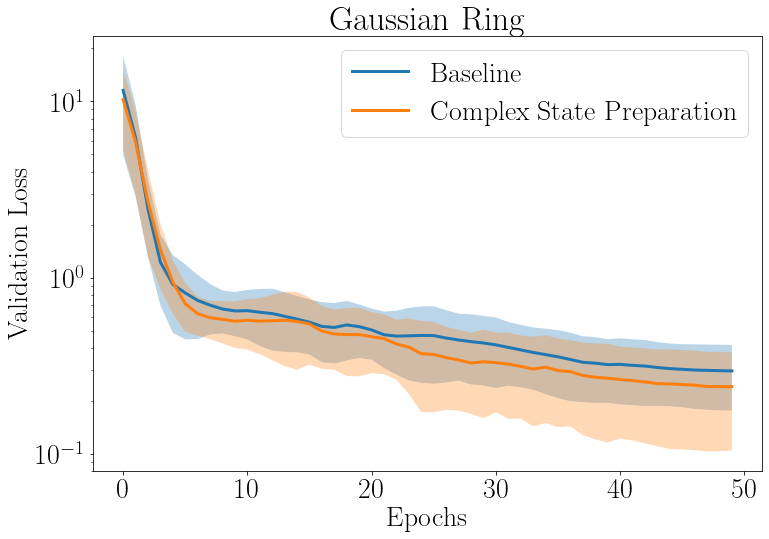

In [125]:
with PdfPages(os.path.join("inn_results", f"convergence_ring_complex.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_ring_baseline)), smooth_ring_baseline, linewidth=3.0, label="Baseline")
    plt.fill_between(range(len(smooth_ring_baseline)), 
                     smooth_ring_baseline-smooth_std_ring_baseline, 
                     smooth_ring_baseline+smooth_std_ring_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_ring_complex)), smooth_ring_complex, linewidth=3.0, label="Complex State Preparation")
    plt.fill_between(range(len(smooth_ring_complex)), 
                     smooth_ring_complex-smooth_std_ring_complex, 
                     smooth_ring_complex+smooth_std_ring_complex,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Gaussian Ring")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

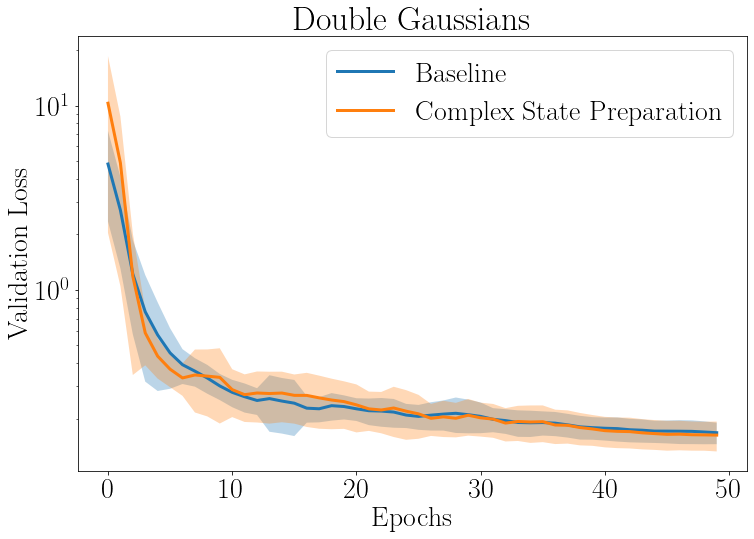

In [126]:
with PdfPages(os.path.join("inn_results", f"convergence_double_complex.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_double_baseline)), smooth_double_baseline, linewidth=3.0, label="Baseline")
    plt.fill_between(range(len(smooth_double_baseline)), 
                     smooth_double_baseline-smooth_std_double_baseline, 
                     smooth_double_baseline+smooth_std_double_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_double_complex)), smooth_double_complex, linewidth=3.0, label="Complex State Preparation")
    plt.fill_between(range(len(smooth_double_complex)), 
                     smooth_double_complex-smooth_std_double_complex, 
                     smooth_double_complex+smooth_std_double_complex,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Double Gaussians")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

## Uniform vs. Gaussian

In [33]:
ds_ring_baseline = load_data_stores("ring_baseline[0-9]")
ds_ring_uniform = load_data_stores("ring_uniform[0-9]")
ds_double_baseline = load_data_stores("double_baseline[0-9]")
ds_double_uniform = load_data_stores("double_uniform[0-9]")

print(len(ds_ring_baseline), len(ds_ring_uniform))
print(len(ds_double_baseline), len(ds_double_uniform))


10 10
10 10


In [34]:
loss_ring_baseline = np.array([ds["loss"] for ds in ds_ring_baseline])
loss_ring_uniform = np.array([ds["loss"] for ds in ds_ring_uniform])
loss_double_baseline = np.array([ds["loss"] for ds in ds_double_baseline])
loss_double_uniform  = np.array([ds["loss"] for ds in ds_double_uniform])

In [35]:
means_ring_baseline = np.mean(loss_ring_baseline, axis=0)
means_ring_uniform = np.nanmean(loss_ring_uniform, axis=0)
means_double_baseline = np.mean(loss_double_baseline, axis=0)
means_double_uniform = np.mean(loss_double_uniform, axis=0)

std_ring_baseline = np.std(loss_ring_baseline, axis=0)
std_ring_uniform = np.nanstd(loss_ring_uniform, axis=0)
std_double_baseline = np.std(loss_double_baseline, axis=0)
std_double_uniform = np.std(loss_double_uniform, axis=0)

In [36]:
min1 = np.min(means_ring_baseline - std_ring_baseline)
min2 = np.min(means_ring_uniform - std_ring_uniform)
min3 = np.min(means_double_baseline -  std_double_baseline)
min4 = np.min(means_double_uniform - np.clip(std_double_uniform, 0, np.max(means_double_uniform)-3))

eps = 1.e-1
min_loss_ring = min(min1, min2) - eps
min_loss_double = min(min3, min4) - eps

corr_ring_baseline = means_ring_baseline - min_loss_ring
corr_ring_uniform = means_ring_uniform - min_loss_ring
corr_double_baseline = means_double_baseline - min_loss_double
corr_double_uniform = means_double_uniform - min_loss_double

In [37]:
window_length = 3
polyorder = 1

smooth_ring_baseline = savgol_filter(corr_ring_baseline, window_length, polyorder)
smooth_std_ring_baseline = savgol_filter(std_ring_baseline, window_length, polyorder)
smooth_ring_uniform = savgol_filter(corr_ring_uniform, window_length, polyorder)
smooth_std_ring_uniform = savgol_filter(std_ring_uniform, window_length, polyorder)
smooth_double_baseline = savgol_filter(corr_double_baseline, window_length, polyorder)
smooth_std_double_baseline = savgol_filter(std_double_baseline, window_length, polyorder)
smooth_double_uniform = savgol_filter(corr_double_uniform, window_length, polyorder)
smooth_std_double_uniform = savgol_filter(std_double_uniform, window_length, polyorder)

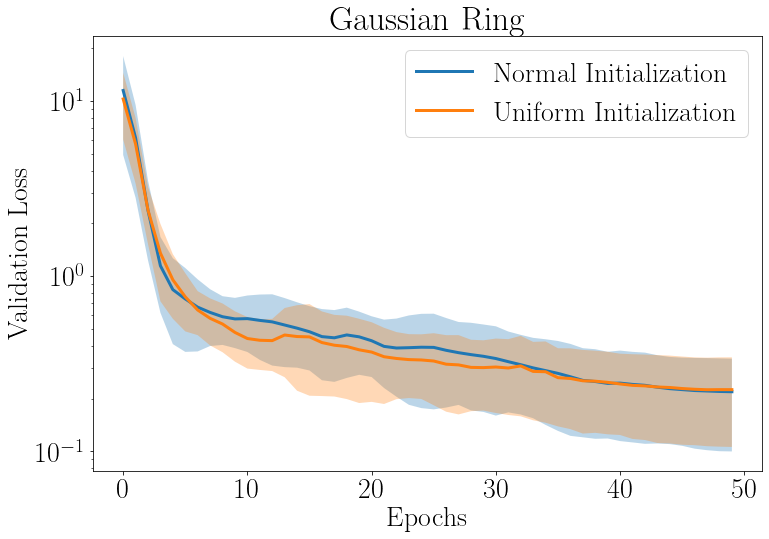

In [38]:
with PdfPages(os.path.join("inn_results", f"convergence_ring_uniform.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_ring_baseline)), smooth_ring_baseline, linewidth=3.0, label="Normal Initialization")
    plt.fill_between(range(len(smooth_ring_baseline)), 
                     smooth_ring_baseline-smooth_std_ring_baseline, 
                     smooth_ring_baseline+smooth_std_ring_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_ring_uniform)), smooth_ring_uniform, linewidth=3.0, label="Uniform Initialization")
    plt.fill_between(range(len(smooth_ring_uniform)), 
                     smooth_ring_uniform-np.clip(smooth_std_ring_uniform, 0, np.max(smooth_ring_uniform)-2), 
                     smooth_ring_uniform+smooth_std_ring_uniform,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Gaussian Ring")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

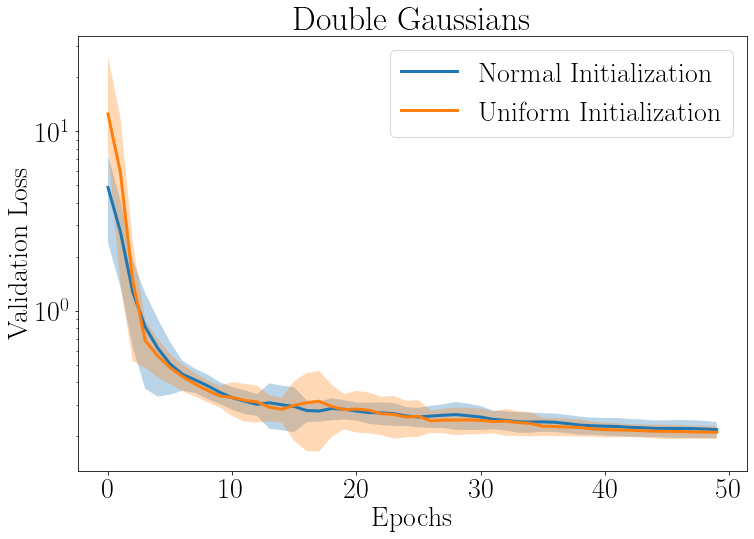

In [39]:
with PdfPages(os.path.join("inn_results", f"convergence_double_uniform.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_double_baseline)), smooth_double_baseline, linewidth=3.0, label="Normal Initialization")
    plt.fill_between(range(len(smooth_double_baseline)), 
                     smooth_double_baseline-smooth_std_double_baseline, 
                     smooth_double_baseline+smooth_std_double_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_double_uniform)), smooth_double_uniform, linewidth=3.0, label="Uniform Initialization")
    plt.fill_between(range(len(smooth_double_uniform)), 
                     smooth_double_uniform-np.clip(smooth_std_double_uniform, 0, np.max(smooth_double_uniform)-8),
                     smooth_double_uniform+smooth_std_double_uniform,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Double Gaussians")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

## CROT vs. Baseline

In [40]:
ds_ring_baseline = load_data_stores("ring_double_layer")
ds_ring_crot = load_data_stores("ring_CROT")
ds_double_baseline = load_data_stores("double_double_layer_1019")
ds_double_crot = load_data_stores("double_CROT")

print(len(ds_ring_baseline), len(ds_ring_crot))
print(len(ds_double_baseline), len(ds_double_crot))


10 10
9 10


In [41]:
loss_ring_baseline = np.array([ds["loss"] for ds in ds_ring_baseline])
loss_ring_crot = np.array([ds["loss"] for ds in ds_ring_crot])
loss_double_baseline = np.array([ds["loss"] for ds in ds_double_baseline])
loss_double_crot  = np.array([ds["loss"] for ds in ds_double_crot])

In [42]:
means_ring_baseline = np.nanmean(loss_ring_baseline, axis=0)
means_ring_crot = np.nanmean(loss_ring_crot, axis=0)
means_double_baseline = np.nanmean(loss_double_baseline, axis=0)
means_double_crot = np.nanmean(loss_double_crot, axis=0)

std_ring_baseline = np.nanstd(loss_ring_baseline, axis=0)
std_ring_crot = np.nanstd(loss_ring_crot, axis=0)
std_double_baseline = np.nanstd(loss_double_baseline, axis=0)
std_double_crot = np.nanstd(loss_double_crot, axis=0)

In [43]:
min1 = np.min(means_ring_baseline - std_ring_baseline)
min2 = np.min(means_ring_crot - std_ring_crot)
min3 = np.min(means_double_baseline -  std_double_baseline)
min4 = np.min(means_double_crot - std_double_crot)

eps = 1.e-1
min_loss_ring = min(min1, min2) - eps
min_loss_double = min(min3, min4) - eps

corr_ring_baseline = means_ring_baseline - min_loss_ring
corr_ring_crot = means_ring_crot - min_loss_ring
corr_double_baseline = means_double_baseline - min_loss_double
corr_double_crot = means_double_crot - min_loss_double

In [44]:
window_length = 3
polyorder = 1

smooth_ring_baseline = savgol_filter(corr_ring_baseline, window_length, polyorder)
smooth_std_ring_baseline = savgol_filter(std_ring_baseline, window_length, polyorder)
smooth_ring_crot = savgol_filter(corr_ring_crot, window_length, polyorder)
smooth_std_ring_crot = savgol_filter(std_ring_crot, window_length, polyorder)
smooth_double_baseline = savgol_filter(corr_double_baseline, window_length, polyorder)
smooth_std_double_baseline = savgol_filter(std_double_baseline, window_length, polyorder)
smooth_double_crot = savgol_filter(corr_double_crot, window_length, polyorder)
smooth_std_double_crot = savgol_filter(std_double_crot, window_length, polyorder)

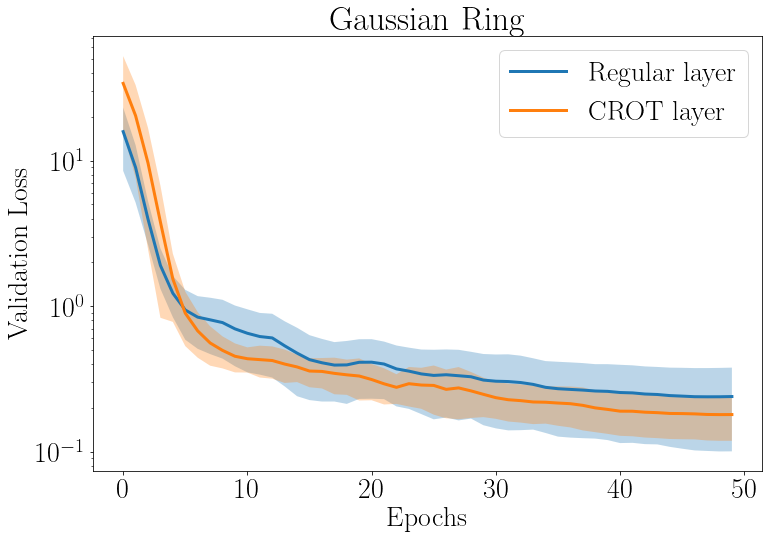

In [45]:
with PdfPages(os.path.join("inn_results", f"convergence_ring_crot.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_ring_baseline)), smooth_ring_baseline, linewidth=3.0, label="Regular layer")
    plt.fill_between(range(len(smooth_ring_baseline)), 
                     smooth_ring_baseline-smooth_std_ring_baseline, 
                     smooth_ring_baseline+smooth_std_ring_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_ring_crot)), smooth_ring_crot, linewidth=3.0, label="CROT layer")
    plt.fill_between(range(len(smooth_ring_crot)), 
                     smooth_ring_crot-smooth_std_ring_crot, 
                     smooth_ring_crot+smooth_std_ring_crot,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Gaussian Ring")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

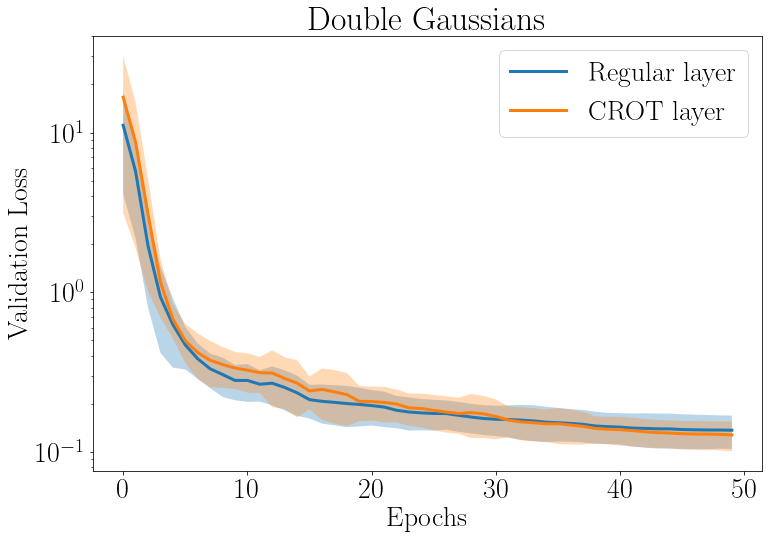

In [46]:
with PdfPages(os.path.join("inn_results", f"convergence_double_crot.pdf")) as pp:
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(smooth_double_baseline)), smooth_double_baseline, linewidth=3.0, label="Regular layer")
    plt.fill_between(range(len(smooth_double_baseline)), 
                     smooth_double_baseline-smooth_std_double_baseline, 
                     smooth_double_baseline+smooth_std_double_baseline,
                     alpha=0.3)
    plt.plot(range(len(smooth_double_crot)), smooth_double_crot, linewidth=3.0, label="CROT layer")
    plt.fill_between(range(len(smooth_double_crot)), 
                     smooth_double_crot-smooth_std_double_crot,
                     smooth_double_crot+smooth_std_double_crot,
                     alpha=0.3)
    plt.yscale("log")
    plt.xlabel(r"Epochs")
    plt.ylabel(r"Validation Loss")
    plt.title(r"Double Gaussians")
    plt.legend()
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)
    plt.show()

## Fidelity Loss Problems

In [44]:
ds_fidelity = torch.load(os.path.join("outputs", "old", "Torch", "QINN_torch_double_onlyFid_1011_0050", "data_store.pth"))
checkpoint_before = ds_fidelity["samples_epoch"][10]
checkpoint_after = ds_fidelity["samples_epoch"][30]

hist1, xedges1, yedges1 = np.histogram2d(checkpoint_before[:,0], 
                             checkpoint_before[:,1], 
                             density=True, bins=[30, 30], 
                             range=[[-5, 5], [-5, 5]])
hist2, xedges2, yedges2 = np.histogram2d(checkpoint_after[:,0], 
                                         checkpoint_after[:,1], 
                                         density=True, 
                                         bins=[30, 30], 
                                         range=[[-5, 5], [-5, 5]])

checkpoint_before = ds_fidelity["latent_epoch"][10]
checkpoint_after = ds_fidelity["latent_epoch"][30]

hist3, xedges3, yedges3 = np.histogram2d(checkpoint_before[:,0], 
                             checkpoint_before[:,1], 
                             density=True, bins=[30, 30], 
                             range=[[-3, 3], [-3, 3]])
hist4, xedges4, yedges4 = np.histogram2d(checkpoint_after[:,0], 
                                         checkpoint_after[:,1], 
                                         density=True, 
                                         bins=[30, 30], 
                                         range=[[-3, 3], [-3, 3]])

loss_fid = ds_fidelity["fidelity_loss"]
loss_gauss = ds_fidelity["gaussian_loss"]

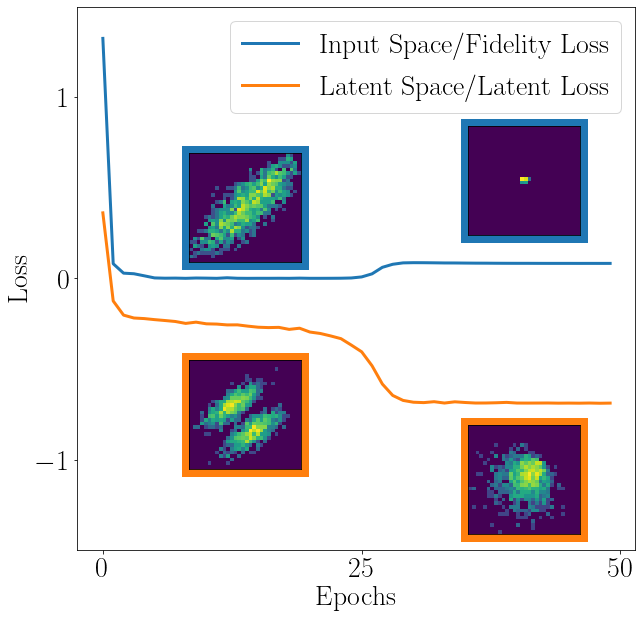

In [47]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
ax.plot(range(len(loss_fid)), loss_fid, label="Input Space/Fidelity Loss", linewidth=3.0)
ax.plot(range(len(loss_gauss)), np.array(loss_gauss)+0.4, label="Latent Space/Latent Loss", linewidth=3.0)
ax.legend()
ax.set_ylim([-1.5,1.5])
ax.set_xticks([0, 25, 50])
ax.set_yticks([-1.0, 0.0, 1.0])
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

ins = ax.inset_axes([0.2,0.53,0.2,0.2])
ins.pcolormesh(*(xedges1, yedges1, hist1.T),  
               rasterized=True, 
               norm=matplotlib.colors.LogNorm(clip=True))

ins.patch.set_edgecolor("C0")
ins.patch.set_linewidth(15.0)
ins.set_xticks([])
ins.set_yticks([])

ins = ax.inset_axes([0.7,0.58,0.2,0.2])
ins.pcolormesh(*(xedges2, yedges2, hist2.T),  
               rasterized=True, 
               norm=matplotlib.colors.LogNorm(clip=True))

ins.patch.set_edgecolor("C0")
ins.patch.set_linewidth(15.0)
ins.set_xticks([])
ins.set_yticks([])

ins = ax.inset_axes([0.2,0.15,0.2,0.2])
ins.pcolormesh(*(xedges3, yedges3, hist3.T),  
               rasterized=True, 
               norm=matplotlib.colors.LogNorm(clip=True))
ins.patch.set_edgecolor("C1")
ins.patch.set_linewidth(15.0)
ins.set_xticks([])
ins.set_yticks([])

ins = ax.inset_axes([0.7,0.03,0.2,0.2])
ins.pcolormesh(*(xedges4, yedges4, hist4.T),  
               rasterized=True, 
               norm=matplotlib.colors.LogNorm(clip=True))
ins.patch.set_edgecolor("C1")
ins.patch.set_linewidth(15.0)
ins.set_xticks([])
ins.set_yticks([])
with PdfPages(os.path.join("inn_results", f"fidelity_problem_example.pdf")) as pp:
    plt.savefig(pp, bbox_inches="tight", format="pdf", pad_inches=0.05)


plt.show()
plt.close()